# Generate Sinusoidal Data with Hourly Timestamps

This notebook generates a CSV file with sinusoidal and cosine waves with hourly timestamps, similar to the ETTh1.csv format.

In [78]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Configuration Parameters

Modify these parameters to control the data generation:

In [79]:
# Configuration parameters
num_samples = 200000  # Number of samples to generate
start_date = "2024-01-01 00:00:00"  # Starting date
output_dir = "./datasets/"
filename = "synthetic_sinusoidal.csv"

print(f"Configuration:")
print(f"Number of samples: {num_samples}")
print(f"Start date: {start_date}")
print(f"Output directory: {output_dir}")
print(f"Output filename: {filename}")

Configuration:
Number of samples: 200000
Start date: 2024-01-01 00:00:00
Output directory: ./datasets/
Output filename: synthetic_sinusoidal.csv


## Data Generation Function

Generated 200000 samples. Data saved to: ./datasets/synthetic_sinusoidal.csv
Shape: (200000, 6)
Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00


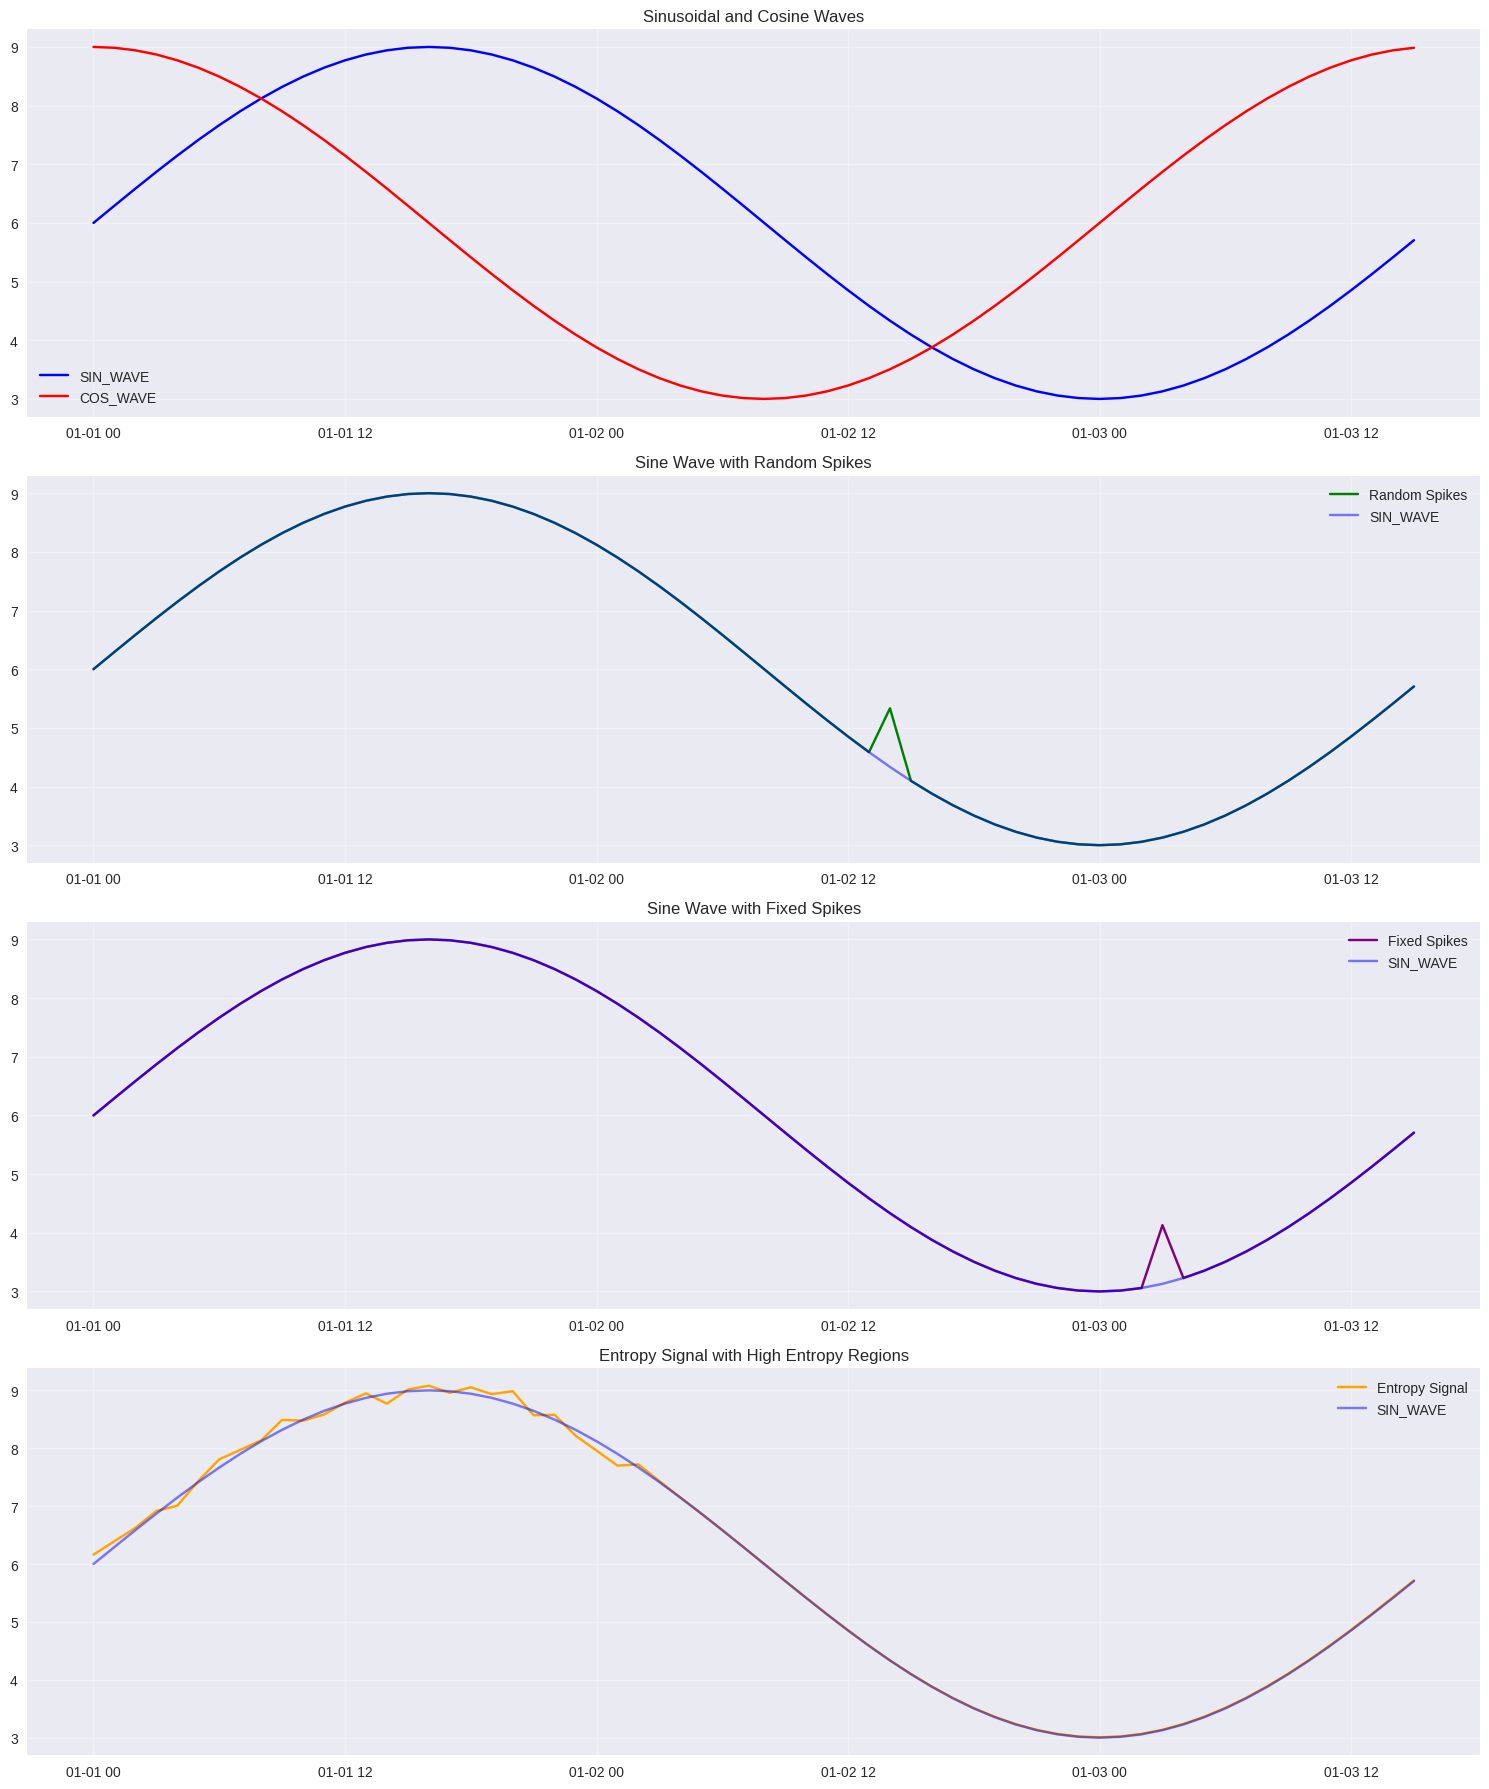

,date,SIN_WAVE,COS_WAVE,SIN_WITH_RANDOM_SPIKES,SIN_WITH_FIXED_SPIKES,ENTROPY_SIGNAL
0,2024-01-01 00:00:00,6.000000,9.000000,6.000000,6.000000,6.161498
1,2024-01-01 01:00:00,6.294053,8.985554,6.294053,6.294053,6.393762
2,2024-01-01 02:00:00,6.585274,8.942355,6.585274,6.585274,6.626062
3,2024-01-01 03:00:00,6.870858,8.870820,6.870858,6.870858,6.916111
4,2024-01-01 04:00:00,7.148056,8.771636,7.148056,7.148056,7.008014


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os

# --- Configuration ---
num_samples = 200000
start_date = "2024-01-01 00:00:00"
output_dir = "./datasets/"
filename = "synthetic_sinusoidal.csv"
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# --- Data Generation ---
start_dt = pd.to_datetime(start_date)
timestamps = [start_dt + timedelta(hours=i) for i in range(num_samples)]
t = np.linspace(0, 2 * np.pi * (num_samples/64), num_samples)
sin_wave = 3 * np.sin(t) + 6
cos_wave = 3 * np.cos(t) + 6
samples_per_period = 64
spike_magnitude = 1
np.random.seed(42)

# Random spikes
random_spike_component = np.zeros(num_samples)
for i in range(0, num_samples, samples_per_period):
    end = min(i + samples_per_period, num_samples)
    if end - i >= 10:
        pos = i + np.random.randint(0, end - i)
        random_spike_component[pos] = spike_magnitude * np.random.choice([-1, 1])
sin_wave_with_random_spikes = sin_wave + random_spike_component

# Fixed spikes
fixed_spike_component = np.zeros(num_samples)
for idx, i in enumerate(range(0, num_samples, samples_per_period)):
    pos = int(i + 0.8 * samples_per_period)
    if pos < num_samples:
        fixed_spike_component[pos] = spike_magnitude * (1 if idx % 2 == 0 else -1)
sin_wave_with_fixed_spikes = sin_wave + fixed_spike_component

# High entropy regions
entropy_signal = sin_wave + np.random.normal(0, 0.1, num_samples)
num_regions = num_samples // 200
min_width, max_width = 20, 80
regions = [(np.random.randint(0, num_samples - w), np.random.randint(0, num_samples - w) + w)
           for w in np.random.randint(min_width, max_width+1, num_regions)]
def chirp_signal(length):
    t_chirp = np.linspace(0, 1, length)
    return 2 * np.sin(2 * np.pi * (5 * t_chirp + 10 * t_chirp**2))
for start, end in regions:
    end = min(end, num_samples)
    if end > start:
        entropy_signal[start:end] = sin_wave[start:end] + chirp_signal(end - start)

# --- Save and Report ---
df = pd.DataFrame({
    'date': timestamps,
    'SIN_WAVE': sin_wave,
    'COS_WAVE': cos_wave,
    'SIN_WITH_RANDOM_SPIKES': sin_wave_with_random_spikes,
    'SIN_WITH_FIXED_SPIKES': sin_wave_with_fixed_spikes,
    'ENTROPY_SIGNAL': entropy_signal
})
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, filename)
df.to_csv(output_path, index=False)

print(f"Generated {num_samples} samples. Data saved to: {output_path}\nShape: {df.shape}\nDate range: {df['date'].min()} to {df['date'].max()}")

# --- Visualization (first 64 samples) ---
plot_df = df.head(64)
fig, axes = plt.subplots(4, 1, figsize=(15, 18))
axes[0].plot(plot_df['date'], plot_df['SIN_WAVE'], label='SIN_WAVE', color='blue')
axes[0].plot(plot_df['date'], plot_df['COS_WAVE'], label='COS_WAVE', color='red')
axes[0].set_title('Sinusoidal and Cosine Waves')
axes[0].legend(); axes[0].grid(True, alpha=0.3)
axes[1].plot(plot_df['date'], plot_df['SIN_WITH_RANDOM_SPIKES'], label='Random Spikes', color='green')
axes[1].plot(plot_df['date'], plot_df['SIN_WAVE'], label='SIN_WAVE', color='blue', alpha=0.5)
axes[1].set_title('Sine Wave with Random Spikes'); axes[1].legend(); axes[1].grid(True, alpha=0.3)
axes[2].plot(plot_df['date'], plot_df['SIN_WITH_FIXED_SPIKES'], label='Fixed Spikes', color='purple')
axes[2].plot(plot_df['date'], plot_df['SIN_WAVE'], label='SIN_WAVE', color='blue', alpha=0.5)
axes[2].set_title('Sine Wave with Fixed Spikes'); axes[2].legend(); axes[2].grid(True, alpha=0.3)
axes[3].plot(plot_df['date'], plot_df['ENTROPY_SIGNAL'], label='Entropy Signal', color='orange')
axes[3].plot(plot_df['date'], plot_df['SIN_WAVE'], label='SIN_WAVE', color='blue', alpha=0.5)
axes[3].set_title('Entropy Signal with High Entropy Regions'); axes[3].legend(); axes[3].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

df.head()


## Generate the Data

Generating smooth sinusoidal data...
Generated 3125 random spikes (exactly 1 per period, 3125 periods)
Generated 3125 fixed spikes at 80% position per period
Generated 1000 high entropy regions with structured chirp signals
Generated 3125 random spikes (exactly 1 per period, 3125 periods)
Generated 3125 fixed spikes at 80% position per period
Generated 1000 high entropy regions with structured chirp signals
Generated 200000 samples of smooth sinusoidal data with controlled spikes and entropy variations
Data saved to: ./datasets/synthetic_sinusoidal.csv
Data shape: (200000, 6)
Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
Frequency: 64 points per complete period
Number of complete periods: 3125.00
Entropy signal: randomly distributed high entropy regions using structured chirp signals
Generated 200000 samples of smooth sinusoidal data with controlled spikes and entropy variations
Data saved to: ./datasets/synthetic_sinusoidal.csv
Data shape: (200000, 6)
Date range: 2024-01-01 0

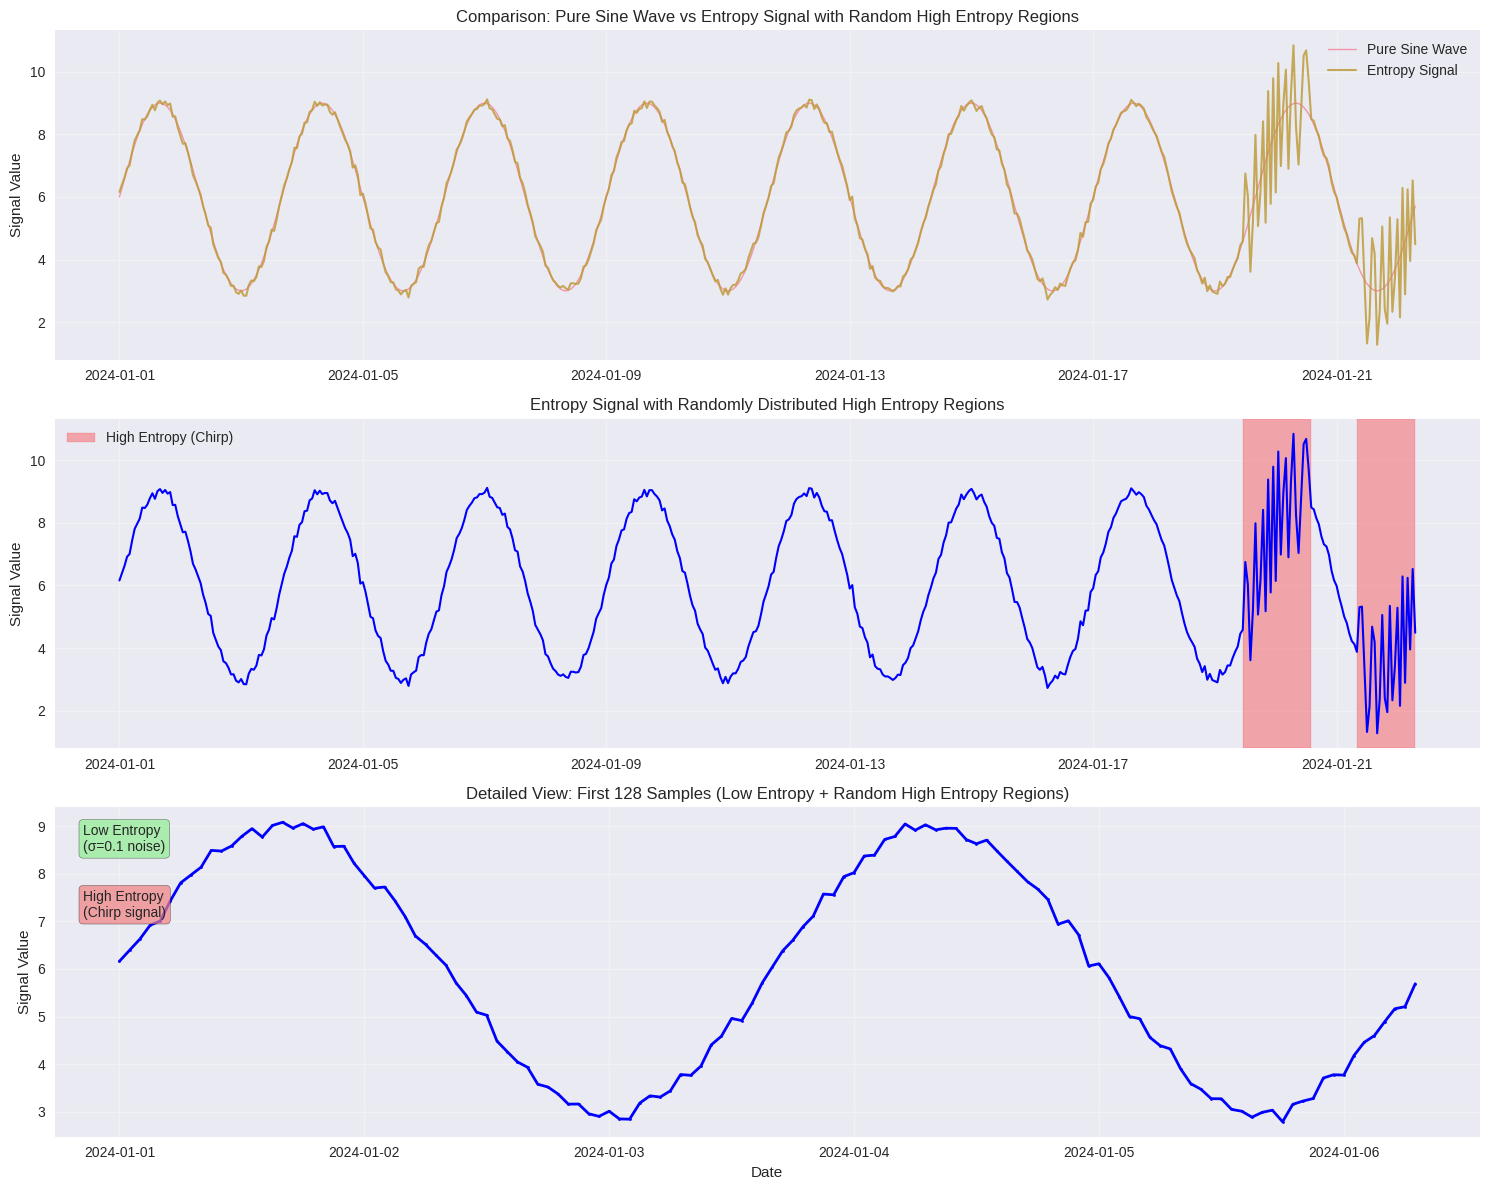


High Entropy Regions:
  Region 1: samples 443-471 (width: 28)
  Region 2: samples 488-524 (width: 36)
  Region 3: samples 774-849 (width: 75)
  Region 4: samples 902-970 (width: 68)
  Region 5: samples 1218-1277 (width: 59)
  ... and 995 more regions

First 10 rows of generated data:


,date,SIN_WAVE,COS_WAVE,SIN_WITH_RANDOM_SPIKES,SIN_WITH_FIXED_SPIKES,ENTROPY_SIGNAL
0,2024-01-01 00:00:00,6.000000,9.000000,6.000000,6.000000,6.161498
1,2024-01-01 01:00:00,6.294053,8.985554,6.294053,6.294053,6.393762
2,2024-01-01 02:00:00,6.585274,8.942355,6.585274,6.585274,6.626062
3,2024-01-01 03:00:00,6.870858,8.870820,6.870858,6.870858,6.916111
4,2024-01-01 04:00:00,7.148056,8.771636,7.148056,7.148056,7.008014
5,2024-01-01 05:00:00,7.414197,8.645760,7.414197,7.414197,7.434874
6,2024-01-01 06:00:00,7.666718,8.494404,7.666718,7.666718,7.808420
7,2024-01-01 07:00:00,7.903188,8.319025,7.903188,7.903188,7.971322
8,2024-01-01 08:00:00,8.121329,8.121312,8.121329,8.121329,8.136762
9,2024-01-01 09:00:00,8.319040,7.903170,8.319040,8.319040,8.490233


In [81]:
# Generate the data
print("Generating smooth sinusoidal data...")
df, output_path = generate_sinusoidal_data(
    num_samples=num_samples,
    start_date=start_date,
    output_dir=output_dir,
    filename=filename
)

# Display first few rows
print("\nFirst 10 rows of generated data:")
df.head(10)

## Data Overview and Statistics

In [82]:
# Display data info
print("Data Info:")
print("=" * 30)
print(df.info())

print("\nData Statistics:")
print("=" * 30)
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    200000 non-null  datetime64[ns]
 1   SIN_WAVE                200000 non-null  float64       
 2   COS_WAVE                200000 non-null  float64       
 3   SIN_WITH_RANDOM_SPIKES  200000 non-null  float64       
 4   SIN_WITH_FIXED_SPIKES   200000 non-null  float64       
 5   ENTROPY_SIGNAL          200000 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.2 MB
None

Data Statistics:


,date,SIN_WAVE,COS_WAVE,SIN_WITH_RANDOM_SPIKES,SIN_WITH_FIXED_SPIKES,ENTROPY_SIGNAL
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2035-05-29 15:30:00.000000768,6.000000,6.000015,5.999755,6.000005,6.015238
min,2024-01-01 00:00:00,3.000000,3.000000,2.000001,2.129228,1.000485
25%,2029-09-14 07:45:00,3.878696,3.878705,3.883333,3.931413,3.934243
50%,2035-05-29 15:30:00,6.000000,6.000024,6.000966,6.000000,6.015958
75%,2041-02-09 23:15:00,8.121304,8.121329,8.115230,8.121304,8.097004
max,2046-10-25 07:00:00,9.000000,9.000000,9.999992,9.000000,10.999967
std,NaN,2.121320,2.121331,2.125532,2.124993,2.224415


## Visualization

### Sinusoidal, Cosine Waves and Controlled Spike Patterns (64 points per period)

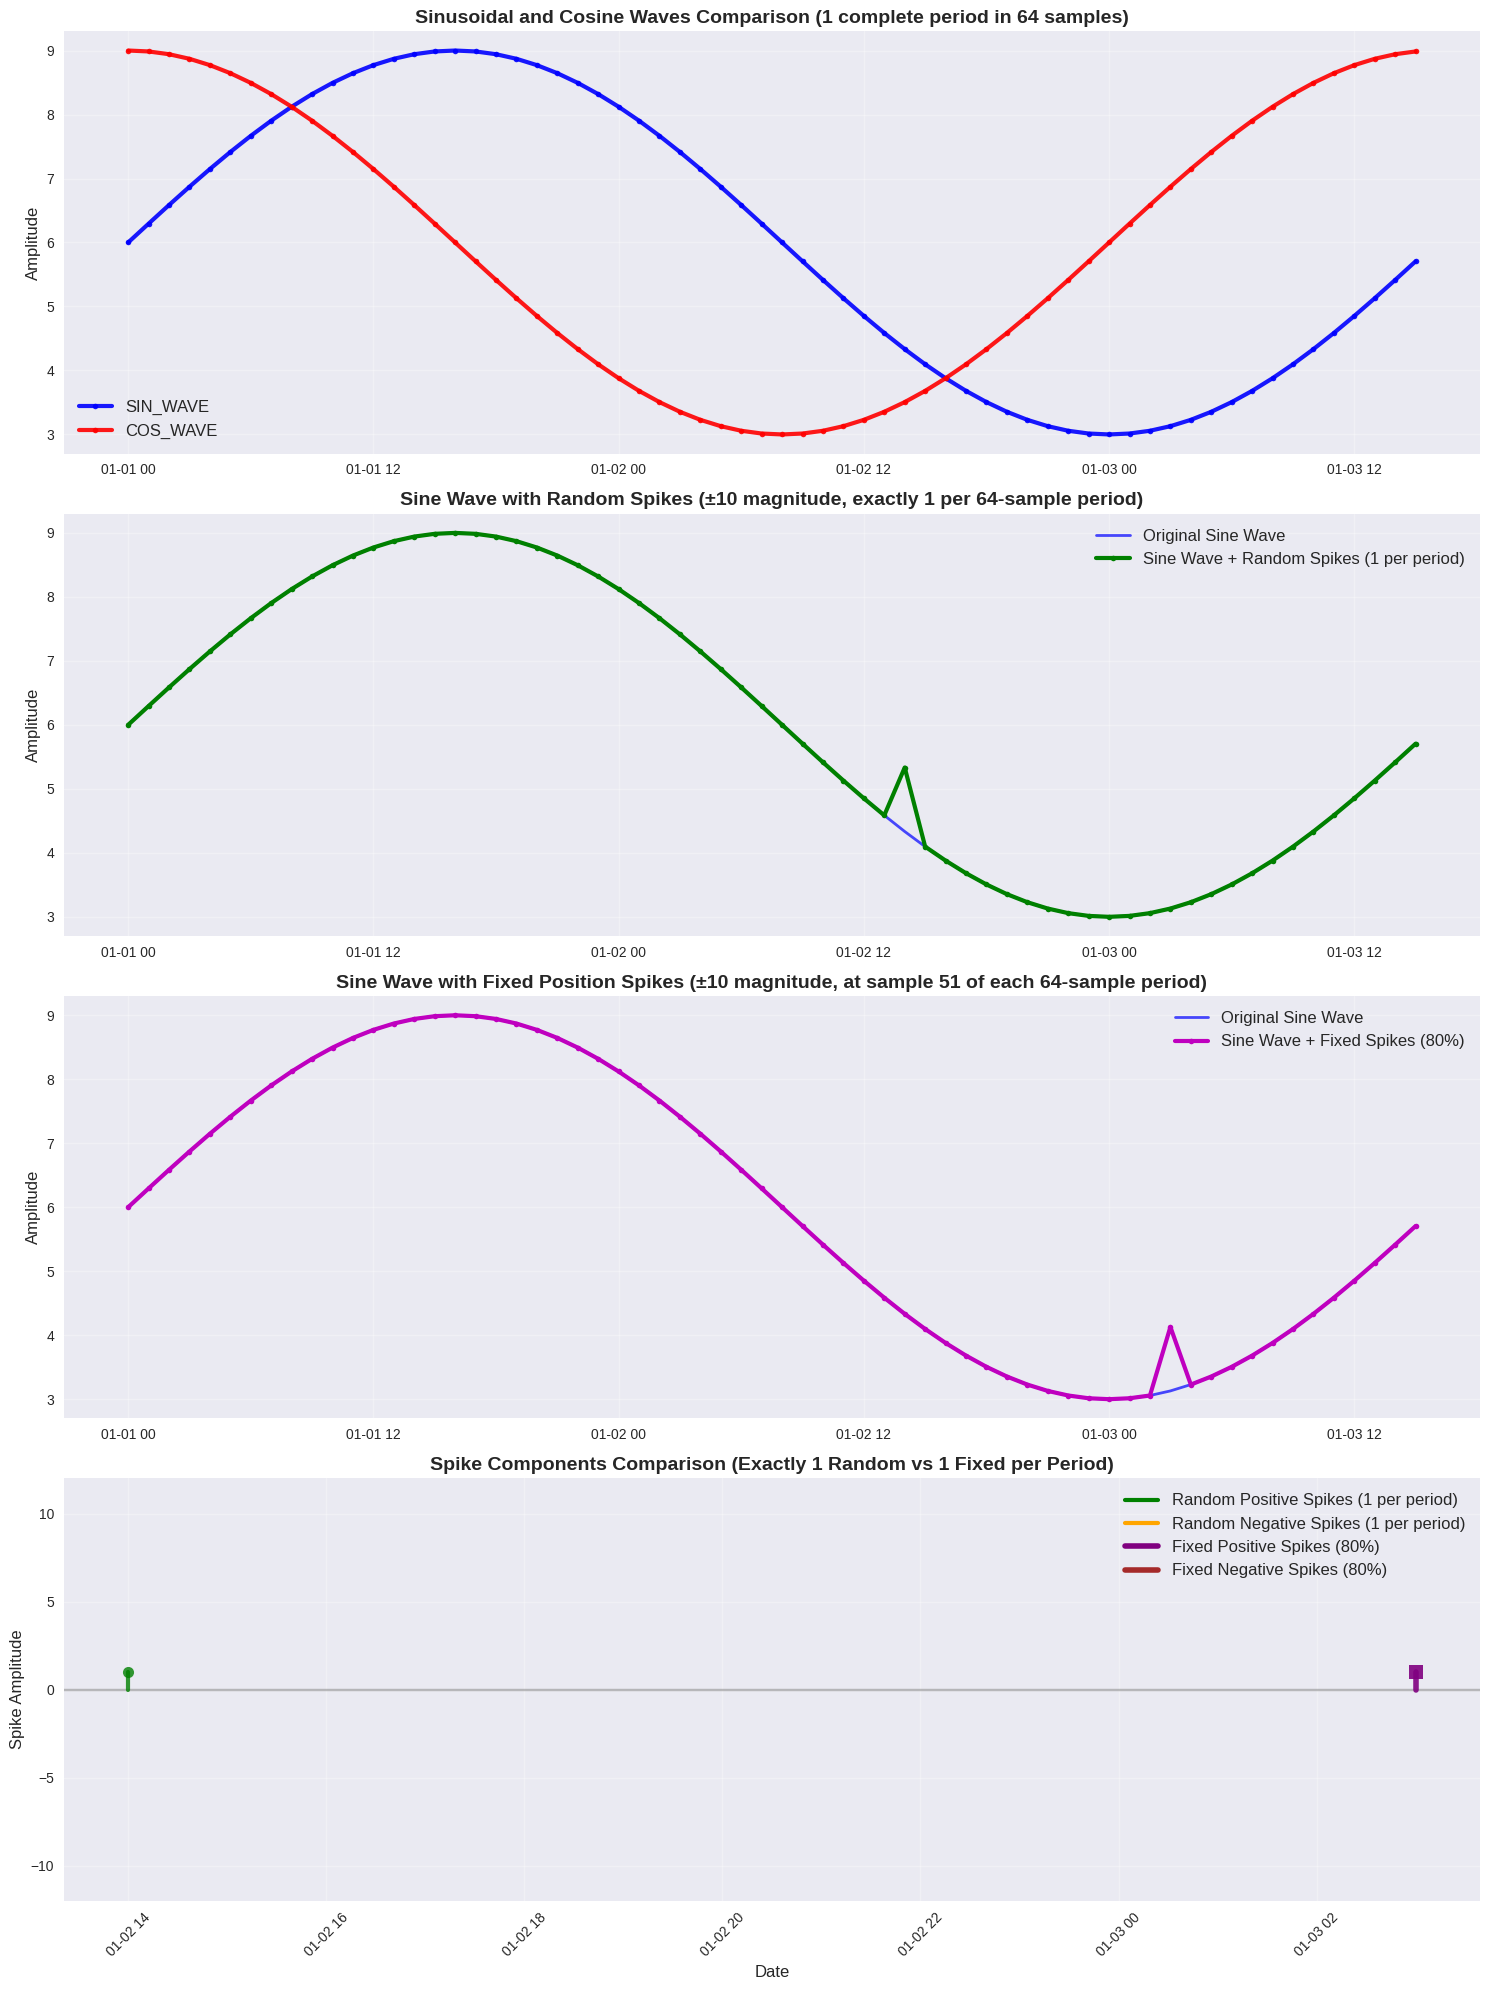


Spike Statistics in First 64 Samples (1 complete period):
Random Spikes (1 per period):
  Total spikes: 1
  Positive spikes: 1
  Negative spikes: 0
  Expected: exactly 1 spike per 64-sample period
  Actual spike positions: [38]
Fixed Position Spikes (80% per period = sample 51):
  Total spikes: 1
  Positive spikes: 1
  Negative spikes: 0
  Expected position: sample 51 of 64 (80% of period)
  Actual spike positions: [51]


In [83]:
# Plot sin, cos waves and both spike variations comparison
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# Plot first 64 samples to show 1 complete period
plot_samples = min(64, len(df))
plot_df = df.head(plot_samples)

# Top plot: Sin and Cos waves
wave_columns = ['SIN_WAVE', 'COS_WAVE']
colors = ['blue', 'red']

for i, (col, color) in enumerate(zip(wave_columns, colors)):
    axes[0].plot(plot_df['date'], plot_df[col], linewidth=3, label=col, color=color, alpha=0.9, marker='o', markersize=4)

axes[0].set_title('Sinusoidal and Cosine Waves Comparison (1 complete period in 64 samples)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# Second plot: Sin wave with random spikes (exactly 1 per period)
axes[1].plot(plot_df['date'], plot_df['SIN_WAVE'], 'b-', linewidth=2, label='Original Sine Wave', alpha=0.7)
axes[1].plot(plot_df['date'], plot_df['SIN_WITH_RANDOM_SPIKES'], 'g-', linewidth=3, label='Sine Wave + Random Spikes (1 per period)', marker='o', markersize=4)

axes[1].set_title('Sine Wave with Random Spikes (±10 magnitude, exactly 1 per 64-sample period)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12)

# Third plot: Sin wave with fixed position spikes
axes[2].plot(plot_df['date'], plot_df['SIN_WAVE'], 'b-', linewidth=2, label='Original Sine Wave', alpha=0.7)
axes[2].plot(plot_df['date'], plot_df['SIN_WITH_FIXED_SPIKES'], 'm-', linewidth=3, label='Sine Wave + Fixed Spikes (80%)', marker='o', markersize=4)

axes[2].set_title('Sine Wave with Fixed Position Spikes (±10 magnitude, at sample 51 of each 64-sample period)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Amplitude', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=12)

# Bottom plot: Comparison of spike components
random_spike_component = plot_df['SIN_WITH_RANDOM_SPIKES'] - plot_df['SIN_WAVE']
fixed_spike_component = plot_df['SIN_WITH_FIXED_SPIKES'] - plot_df['SIN_WAVE']

# Plot zero line
axes[3].axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Plot random spikes
random_spike_indices = plot_df[random_spike_component != 0].index
for idx in random_spike_indices:
    spike_value = random_spike_component.loc[idx]
    date_value = plot_df.loc[idx, 'date']
    axes[3].plot([date_value, date_value], [0, spike_value], 
                color='green' if spike_value > 0 else 'orange', 
                linewidth=3, alpha=0.8)
    axes[3].plot(date_value, spike_value, 'o', 
                color='green' if spike_value > 0 else 'orange', 
                markersize=8, alpha=0.8)

# Plot fixed spikes
fixed_spike_indices = plot_df[fixed_spike_component != 0].index
for idx in fixed_spike_indices:
    spike_value = fixed_spike_component.loc[idx]
    date_value = plot_df.loc[idx, 'date']
    axes[3].plot([date_value, date_value], [0, spike_value], 
                color='purple' if spike_value > 0 else 'brown', 
                linewidth=4, alpha=0.9)
    axes[3].plot(date_value, spike_value, 's', 
                color='purple' if spike_value > 0 else 'brown', 
                markersize=10, alpha=0.9)

axes[3].set_title(f'Spike Components Comparison (Exactly 1 Random vs 1 Fixed per Period)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Date', fontsize=12)
axes[3].set_ylabel('Spike Amplitude', fontsize=12)
axes[3].grid(True, alpha=0.3)
axes[3].set_ylim(-12, 12)  # Set limits to show spike range clearly

# Add legends for spikes
legend_elements = []
if len(random_spike_indices) > 0:
    legend_elements.extend([
        plt.Line2D([0], [0], color='green', linewidth=3, label='Random Positive Spikes (1 per period)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='Random Negative Spikes (1 per period)')
    ])
if len(fixed_spike_indices) > 0:
    legend_elements.extend([
        plt.Line2D([0], [0], color='purple', linewidth=4, label='Fixed Positive Spikes (80%)'),
        plt.Line2D([0], [0], color='brown', linewidth=4, label='Fixed Negative Spikes (80%)')
    ])

if legend_elements:
    axes[3].legend(handles=legend_elements, fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show statistics about spikes in the plotted range
random_spike_component_plot = plot_df['SIN_WITH_RANDOM_SPIKES'] - plot_df['SIN_WAVE']
fixed_spike_component_plot = plot_df['SIN_WITH_FIXED_SPIKES'] - plot_df['SIN_WAVE']

random_spike_count = np.sum(random_spike_component_plot != 0)
fixed_spike_count = np.sum(fixed_spike_component_plot != 0)

random_positive_spikes = np.sum(random_spike_component_plot > 0)
random_negative_spikes = np.sum(random_spike_component_plot < 0)
fixed_positive_spikes = np.sum(fixed_spike_component_plot > 0)
fixed_negative_spikes = np.sum(fixed_spike_component_plot < 0)

print(f"\nSpike Statistics in First {plot_samples} Samples (1 complete period):")
print(f"Random Spikes (1 per period):")
print(f"  Total spikes: {random_spike_count}")
print(f"  Positive spikes: {random_positive_spikes}")
print(f"  Negative spikes: {random_negative_spikes}")
print(f"  Expected: exactly 1 spike per 64-sample period")
if random_spike_count > 0:
    random_positions = plot_df[random_spike_component_plot != 0].index.tolist()
    print(f"  Actual spike positions: {random_positions}")

print(f"Fixed Position Spikes (80% per period = sample 51):")
print(f"  Total spikes: {fixed_spike_count}")
print(f"  Positive spikes: {fixed_positive_spikes}")
print(f"  Negative spikes: {fixed_negative_spikes}")
print(f"  Expected position: sample 51 of 64 (80% of period)")
if fixed_spike_count > 0:
    fixed_positions = plot_df[fixed_spike_component_plot != 0].index.tolist()
    print(f"  Actual spike positions: {fixed_positions}")

## Final Summary

In [84]:
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"✓ Generated {num_samples} samples of smooth sinusoidal data with controlled spikes")
print(f"✓ Data saved to: {output_path}")
print(f"✓ Data shape: {df.shape}")
print(f"✓ Date range: {df['date'].min()} to {df['date'].max()}")
print(f"✓ Columns: {list(df.columns)}")
print("✓ Visualization: Generated waves and controlled spike comparison displayed")

# Calculate and display spike statistics
random_spike_component = df['SIN_WITH_RANDOM_SPIKES'] - df['SIN_WAVE']
total_random_spikes = np.sum(random_spike_component != 0)
random_positive_spikes = np.sum(random_spike_component > 0)
random_negative_spikes = np.sum(random_spike_component < 0)

print(f"\nWave Configuration:")
print(f"  • Frequency: 64 points per complete period")
print(f"  • Total periods in dataset: {num_samples / 64:.2f}")
print(f"  • Sine wave amplitude: 3 (range: 3 to 9)")
print(f"  • Cosine wave amplitude: 3 (range: 3 to 9)")

print(f"\nSpike Configuration:")
print(f"  • Random spikes: exactly 1 per 64-sample period at random location")
print(f"  • Fixed spikes: exactly 1 per 64-sample period at position 51 (80%)")
print(f"  • Spike magnitude: ±10")

print(f"\nRandom Spike Statistics:")
print(f"  • Total random spikes: {total_random_spikes:,}")
print(f"  • Positive spikes (+10): {random_positive_spikes:,}")
print(f"  • Negative spikes (-10): {random_negative_spikes:,}")
print(f"  • Expected total: {int(num_samples / 64)} (1 per period)")
print(f"  • Spike density: 1 spike per 64 samples = {(1/64)*100:.2f}% coverage")

# Calculate fixed spike statistics
fixed_spike_component = df['SIN_WITH_FIXED_SPIKES'] - df['SIN_WAVE']
total_fixed_spikes = np.sum(fixed_spike_component != 0)
fixed_positive_spikes = np.sum(fixed_spike_component > 0)
fixed_negative_spikes = np.sum(fixed_spike_component < 0)
expected_fixed_spikes = int(num_samples / 64)  # One spike per 64-sample period

print(f"\nFixed Spike Statistics:")
print(f"  • Total fixed spikes: {total_fixed_spikes} (expected: {expected_fixed_spikes})")
print(f"  • Positive spikes (+10): {fixed_positive_spikes:,}")
print(f"  • Negative spikes (-10): {fixed_negative_spikes:,}")
print(f"  • Fixed spike position: sample 51 of each 64-sample period (80%)")

print(f"\nData Range Statistics:")
print(f"  • SIN_WAVE range: [{df['SIN_WAVE'].min():.2f}, {df['SIN_WAVE'].max():.2f}]")
print(f"  • COS_WAVE range: [{df['COS_WAVE'].min():.2f}, {df['COS_WAVE'].max():.2f}]")
print(f"  • SIN_WITH_RANDOM_SPIKES range: [{df['SIN_WITH_RANDOM_SPIKES'].min():.2f}, {df['SIN_WITH_RANDOM_SPIKES'].max():.2f}]")
print(f"  • SIN_WITH_FIXED_SPIKES range: [{df['SIN_WITH_FIXED_SPIKES'].min():.2f}, {df['SIN_WITH_FIXED_SPIKES'].max():.2f}]")

print(f"\nGenerated files:")
print(f"  - CSV data: {filename}")
print("\nThe sinusoidal data with controlled spike patterns is ready for analysis!")
print("• SIN_WAVE: Smooth sinusoidal wave (3 amplitude, 64 points per period)")
print("• COS_WAVE: Smooth cosine wave (3 amplitude, 64 points per period)")
print("• SIN_WITH_RANDOM_SPIKES: Sine wave + exactly 1 random spike per period (±10 magnitude)")
print("• SIN_WITH_FIXED_SPIKES: Sine wave + exactly 1 fixed spike per period at 80% position")


SUMMARY
✓ Generated 200000 samples of smooth sinusoidal data with controlled spikes
✓ Data saved to: ./datasets/synthetic_sinusoidal.csv
✓ Data shape: (200000, 6)
✓ Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
✓ Columns: ['date', 'SIN_WAVE', 'COS_WAVE', 'SIN_WITH_RANDOM_SPIKES', 'SIN_WITH_FIXED_SPIKES', 'ENTROPY_SIGNAL']
✓ Visualization: Generated waves and controlled spike comparison displayed

Wave Configuration:
  • Frequency: 64 points per complete period
  • Total periods in dataset: 3125.00
  • Sine wave amplitude: 3 (range: 3 to 9)
  • Cosine wave amplitude: 3 (range: 3 to 9)

Spike Configuration:
  • Random spikes: exactly 1 per 64-sample period at random location
  • Fixed spikes: exactly 1 per 64-sample period at position 51 (80%)
  • Spike magnitude: ±10

Random Spike Statistics:
  • Total random spikes: 3,125
  • Positive spikes (+10): 1,538
  • Negative spikes (-10): 1,587
  • Expected total: 3125 (1 per period)
  • Spike density: 1 spike per 64 samples = 1.56% 